## General usage

Welcome to the PANELpy!

This repository is distributed as accompanying software for publication: [Weisong Zhao et al., Quantitatively mapping local quality of super-resolution microscopy by rolling Fourier ring correlation, Light: Science & Applications (2023).](https://doi.org/10.1038/s41377-023-01321-0), allowing rFRC mapping and PANEL pinpointing.

**Uncertainty types:** There are exiting two major categories of reconstruction uncertainty in computational microscopy imaging, including the `model uncertainty` and the `data uncertainty`. The `model uncertainty` are primarily caused by the difference between the artificially created estimation model and its physical, real-world counterpart, which can be detected and minimized by careful calibration of the optical microscopy system or enough training data in learning-based applications. The `data uncertainty` are mostly introduced by joint effects of the noise condition and sampling capability of the hardware equipment. Notably, different from the `model uncertainty`, the `data uncertainty` are free from the model, inevitable, and may be hard to be suppressed by system calibration or adding more training datasets.

**rFRC:** The `rFRC` is for quantitatively mapping the local image quality (effective resolution, data uncertainty). The lower effective resolution gives a higher probability to the error existence, and thus we can use it to represent the uncertainty revealing the error distribution.

**PANEL:** In this plugin, `PANEL` is a `filtered rFRC` map, for biologists to qualitatively pinpoint regions with low reliability as a concise visualization

**Note:** Our `rFRC` and `PANEL` cannot fully pinpoint the unreliable regions induced by the model bias, which would require more extensive characterization and correction routines based on the underlying theory of the corresponding models.

More details see also [PANELM Wiki](https://github.com/WeisongZhao/PANELM/wiki).

### Input arguments

- `img_stack` : input two images to be evaluated, ndarray, shape (2, M, N)
- `pixelSize` : pixel size in nanometer {default: 30.25}
- `boundaryintensity` : background intensity (0~255 range, 8bit) {default: 5}
- `skip` : skip size to accelerate the rFRC calculation {default: 1}

### Output arguments:

- `FRCmap`: rFRC map

- `PANELs`: PANEL map

- `absolute_value` : [minimum resolution, maximum resolution, mean resolution, rFRC value]

## An example

Here you can find the example dataset, [HDSMLM_20nmpixel_background_15.tif](https://github.com/WeisongZhao/PANELM/releases/download/v0.3.0/HDSMLM_20nmpixel_background_15.tif).

In [1]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PANEL import PANEL
from fSNR.fSNRmap import fSNRmap
from Utils.shifted_jet import sjet_colorbar

file = 'HDSMLM_20nmpixel_background_15.tif'
stack = tifffile.imread(file)

[map_bg_15, PANELs_bg_15, absolute_value_bg_15] = PANEL(stack, pixelsize = 20, skip = 1, backgroundIntensity = 15, EnableOtsu = False)
tifffile.imsave('map_bg_15.tif', map_bg_15)

PANEL estimation start...
High-resolution fSNR estimation...
Global metrics:

rFRC value: 0.5972909001458895 

mean resolution: 73.47538140671091 nm

minimum resolution: 46.0 nm

maximum resolution: 256.0 nm

PANEL estimation done, thank you for your waiting
Total time cost: 0:05:29.111457


## Calculation and visualization

There are only two parameters should be adjusted according to your data and specific usage.

### The first one is the `boundaryintensity`

This parameter should be selected to remove background area calculation but avoiding to overfilter the image content.

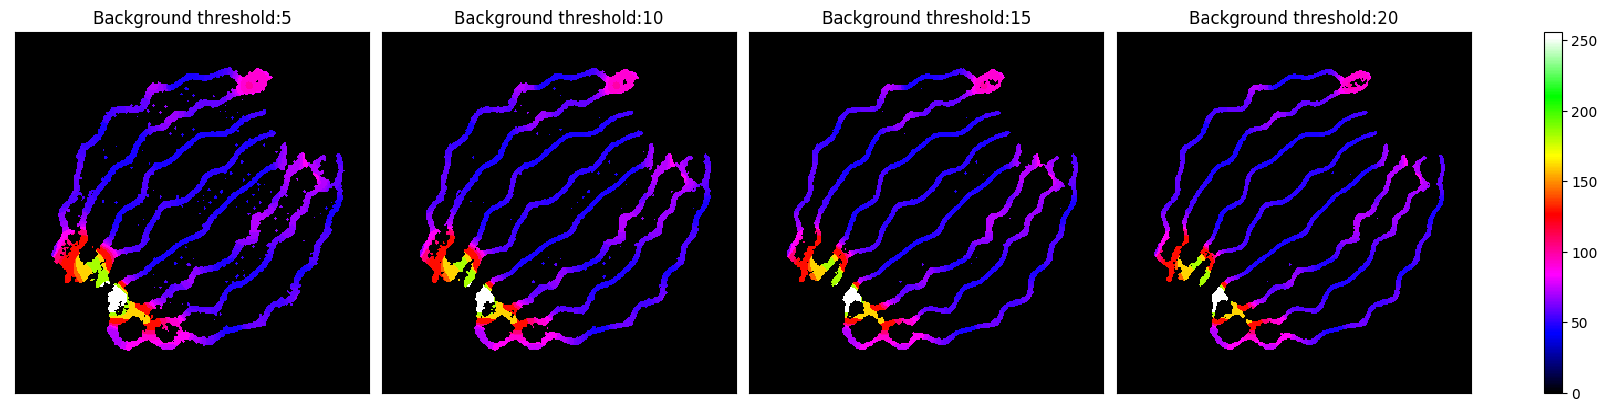

In [2]:
sjet_map = sjet_colorbar()

map_bg_5 = fSNRmap(stack, pixelsize = 20, skip = 1, backgroundIntensity = 5)
map_bg_10 = fSNRmap(stack, pixelsize = 20, skip = 1, backgroundIntensity = 10)
map_bg_15 = fSNRmap(stack, pixelsize = 20, skip = 1, backgroundIntensity = 15)
map_bg_20 = fSNRmap(stack, pixelsize = 20, skip = 1, backgroundIntensity = 20)
map_stack = [map_bg_5, map_bg_10, map_bg_15, map_bg_20]


norm = mcolors.Normalize(vmin=0., vmax=256.)
pc_kwargs = {'rasterized': True, 'cmap': sjet_map, 'norm': norm}
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Background threshold:')+('%d'%(5*(flage+1))))
    im = ax.pcolormesh(map_stack[flage][::-1], **pc_kwargs)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs)
plt.show()

### The last one is the `skip`

Although the rFRC allows evaluation at the pixel level, the most delicate scale of detectable errors can only reach the highest resolution allowed by the system, which satisfies the Nyquist-Shannon sampling theorem. Thus, the smallest error should be larger than 3 × 3 pixels. Therefore, we can skip `2~4` pixels for each rolling operation to accelerate the mapping calculation `4~16` times. The rFRC map will be resized to the original image size by a interpolation for better visualization.

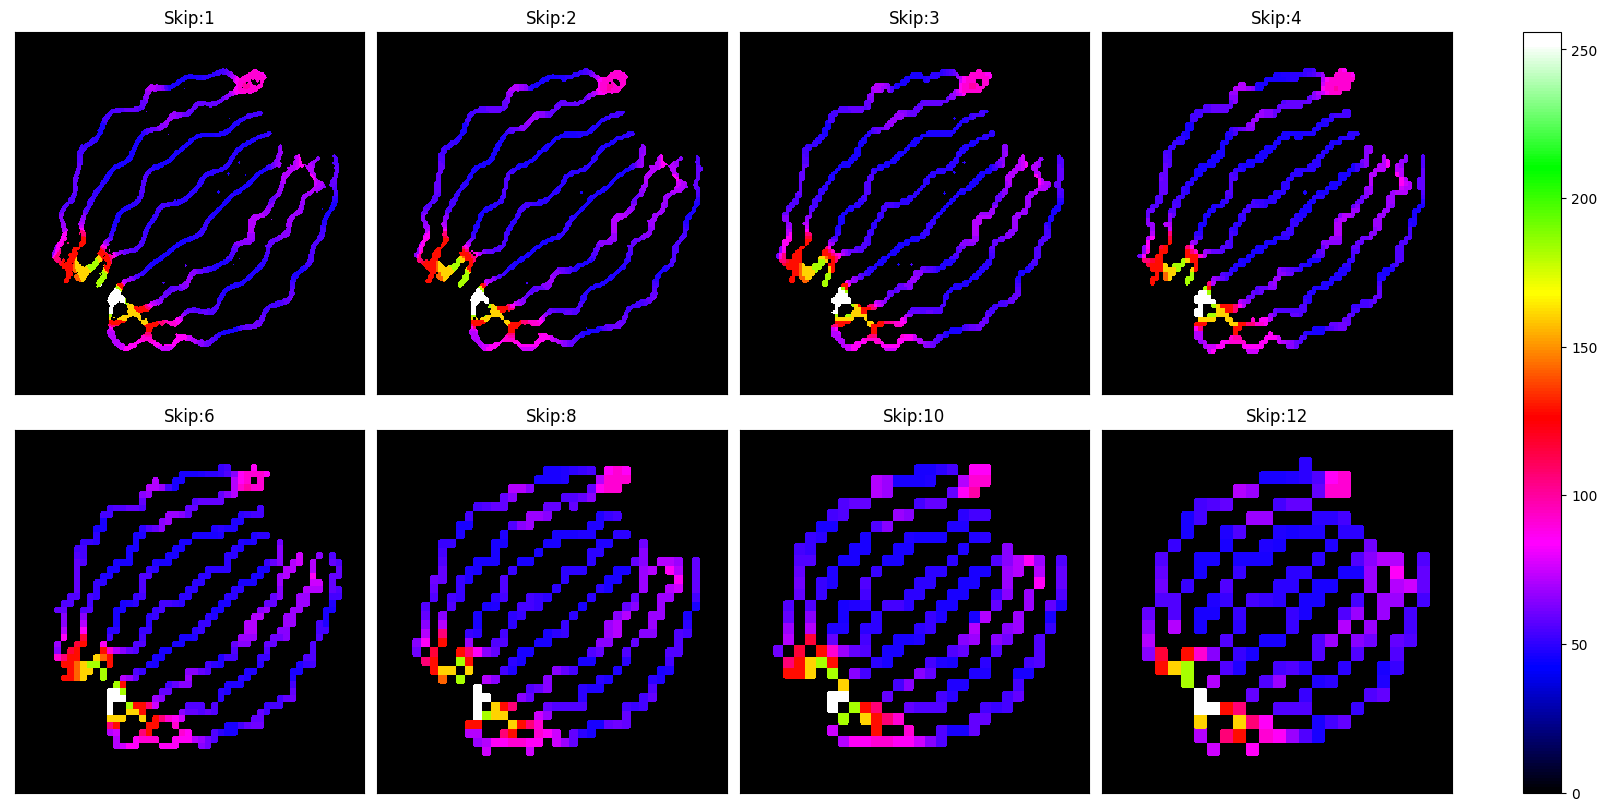

In [3]:
map_skip_1 = fSNRmap(stack, pixelsize = 20, skip = 1, backgroundIntensity = 15)
map_skip_2 = fSNRmap(stack, pixelsize = 20, skip = 2, backgroundIntensity = 15)
map_skip_3 = fSNRmap(stack, pixelsize = 20, skip = 3, backgroundIntensity = 15)
map_skip_4 = fSNRmap(stack, pixelsize = 20, skip = 4, backgroundIntensity = 15)
map_skip_6 = fSNRmap(stack, pixelsize = 20, skip = 6, backgroundIntensity = 15)
map_skip_8 = fSNRmap(stack, pixelsize = 20, skip = 8, backgroundIntensity = 15)
map_skip_10 = fSNRmap(stack, pixelsize = 20, skip = 10, backgroundIntensity = 15)
map_skip_12 = fSNRmap(stack, pixelsize = 20, skip = 12, backgroundIntensity = 15)
map_stack2 = [map_skip_1, map_skip_2, map_skip_3, map_skip_4, map_skip_6, map_skip_8, map_skip_10, map_skip_12]
map_number = [1, 2, 3, 4, 6, 8, 10, 12]


norm = mcolors.Normalize(vmin=0., vmax=256.)
pc_kwargs = {'rasterized': True, 'cmap': sjet_map, 'norm': norm}
fig, axs = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Skip:')+('%d'%(map_number[flage])))
    im = ax.pcolormesh(map_stack2[flage][::-1], **pc_kwargs)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs)
plt.show()